In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1234)
from scipy import linalg as la
import seaborn as sns
import pandas as pd

1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [2]:
#N
N=2000

#x1 distributed as N(0,1)
x1 = np.random.normal(0,1,N)
#x2 distributed as x1+N(0,3)
x2 = x1+np.random.normal(0,3,N)
#x3 distributed ad 2x1+x2
x3 = 2*x1+x2

In [3]:
#matrix of the dataset
matrix_3D=np.vstack((x1,x2,x3))
print('Matrix of the dataset:','\n',matrix_3D,'\n')
#covariance matrix
matrix_cov=np.cov(matrix_3D)
print('Covariance matrix:','\n',matrix_cov,'\n')

Matrix of the dataset: 
 [[ 0.47143516 -1.19097569  1.43270697 ...  0.78146289  2.14715177
  -0.90835053]
 [-3.0896883   3.66026902  1.30466307 ...  2.89045371  1.1913555
  -0.21050614]
 [-2.14681797  1.27831763  4.170077   ...  4.4533795   5.48565903
  -2.0272072 ]] 

Covariance matrix: 
 [[ 0.96519255  1.03984257  2.97022767]
 [ 1.03984257  9.88327874 11.96296388]
 [ 2.97022767 11.96296388 17.90341922]] 



In [4]:
#eigenvectors and eigenvalues
l, V = la.eig(matrix_cov)
print('Eigenvalues:','\n',l,'\n')
print('Eigenvectors:','\n',V)

Eigenvalues: 
 [ 2.68627317e+01+0.j -4.51426596e-16+0.j  1.88915883e+00+0.j] 

Eigenvectors: 
 [[-0.11590133 -0.81649658  0.56559722]
 [-0.57681097 -0.40824829 -0.70754678]
 [-0.80861362  0.40824829  0.42364766]]


In [5]:
#eigenvectors and eigenvalues using SVD
U, spectrum, Vt = la.svd(matrix_3D)
l_svd=spectrum**2/(N-1)
V_svd=U
print('Eigenvalues:','\n',l_svd,'\n')
print('Eigenvectors:','\n',V_svd)

Eigenvalues: 
 [2.68834975e+01 1.88961286e+00 3.37925303e-31] 

Eigenvectors: 
 [[-0.11597084  0.56558297 -0.81649658]
 [-0.576724   -0.70761766 -0.40824829]
 [-0.80866568  0.42354828  0.40824829]]


In [6]:
#variability
Lambda=np.diag(l_svd)
print('Lambda: ','\n',Lambda,'\n')
print('Trace:','\n', np.trace(Lambda),'\n')
var=[]
for i in range(3):
    var.append(Lambda[i,i]/np.trace(Lambda))
print('Variability of the principal components: ','\n', var,'\n' )
print('Total variability of the principal components: ','\n', sum(var),'\n' )
print('Taking the two first principal components total variability: ','\n',(var[0]+var[1])/sum(var))

Lambda:  
 [[2.68834975e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.88961286e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.37925303e-31]] 

Trace: 
 28.773110391471782 

Variability of the principal components:  
 [0.9343271256532917, 0.06567287434670825, 1.174448290391993e-32] 

Total variability of the principal components:  
 0.9999999999999999 

Taking the two first principal components total variability:  
 1.0


In [7]:
#rotation
matrix_3Dp=np.dot(V_svd.T, matrix_3D)
matrix_3Dp

array([[ 3.46328270e+00, -3.00657816e+00, -4.29078091e+00, ...,
        -5.35891612e+00, -5.37215451e+00,  1.86607902e+00],
       [ 1.54367265e+00, -2.72223735e+00,  1.65334098e+00, ...,
         2.82867232e-01,  2.69480973e+00, -1.22340985e+00],
       [-2.36580558e-16,  3.28793864e-16, -4.34415015e-16, ...,
        -2.74119859e-16, -8.02469846e-16,  3.76119380e-16]])

Text(0, 0.5, 'x2')

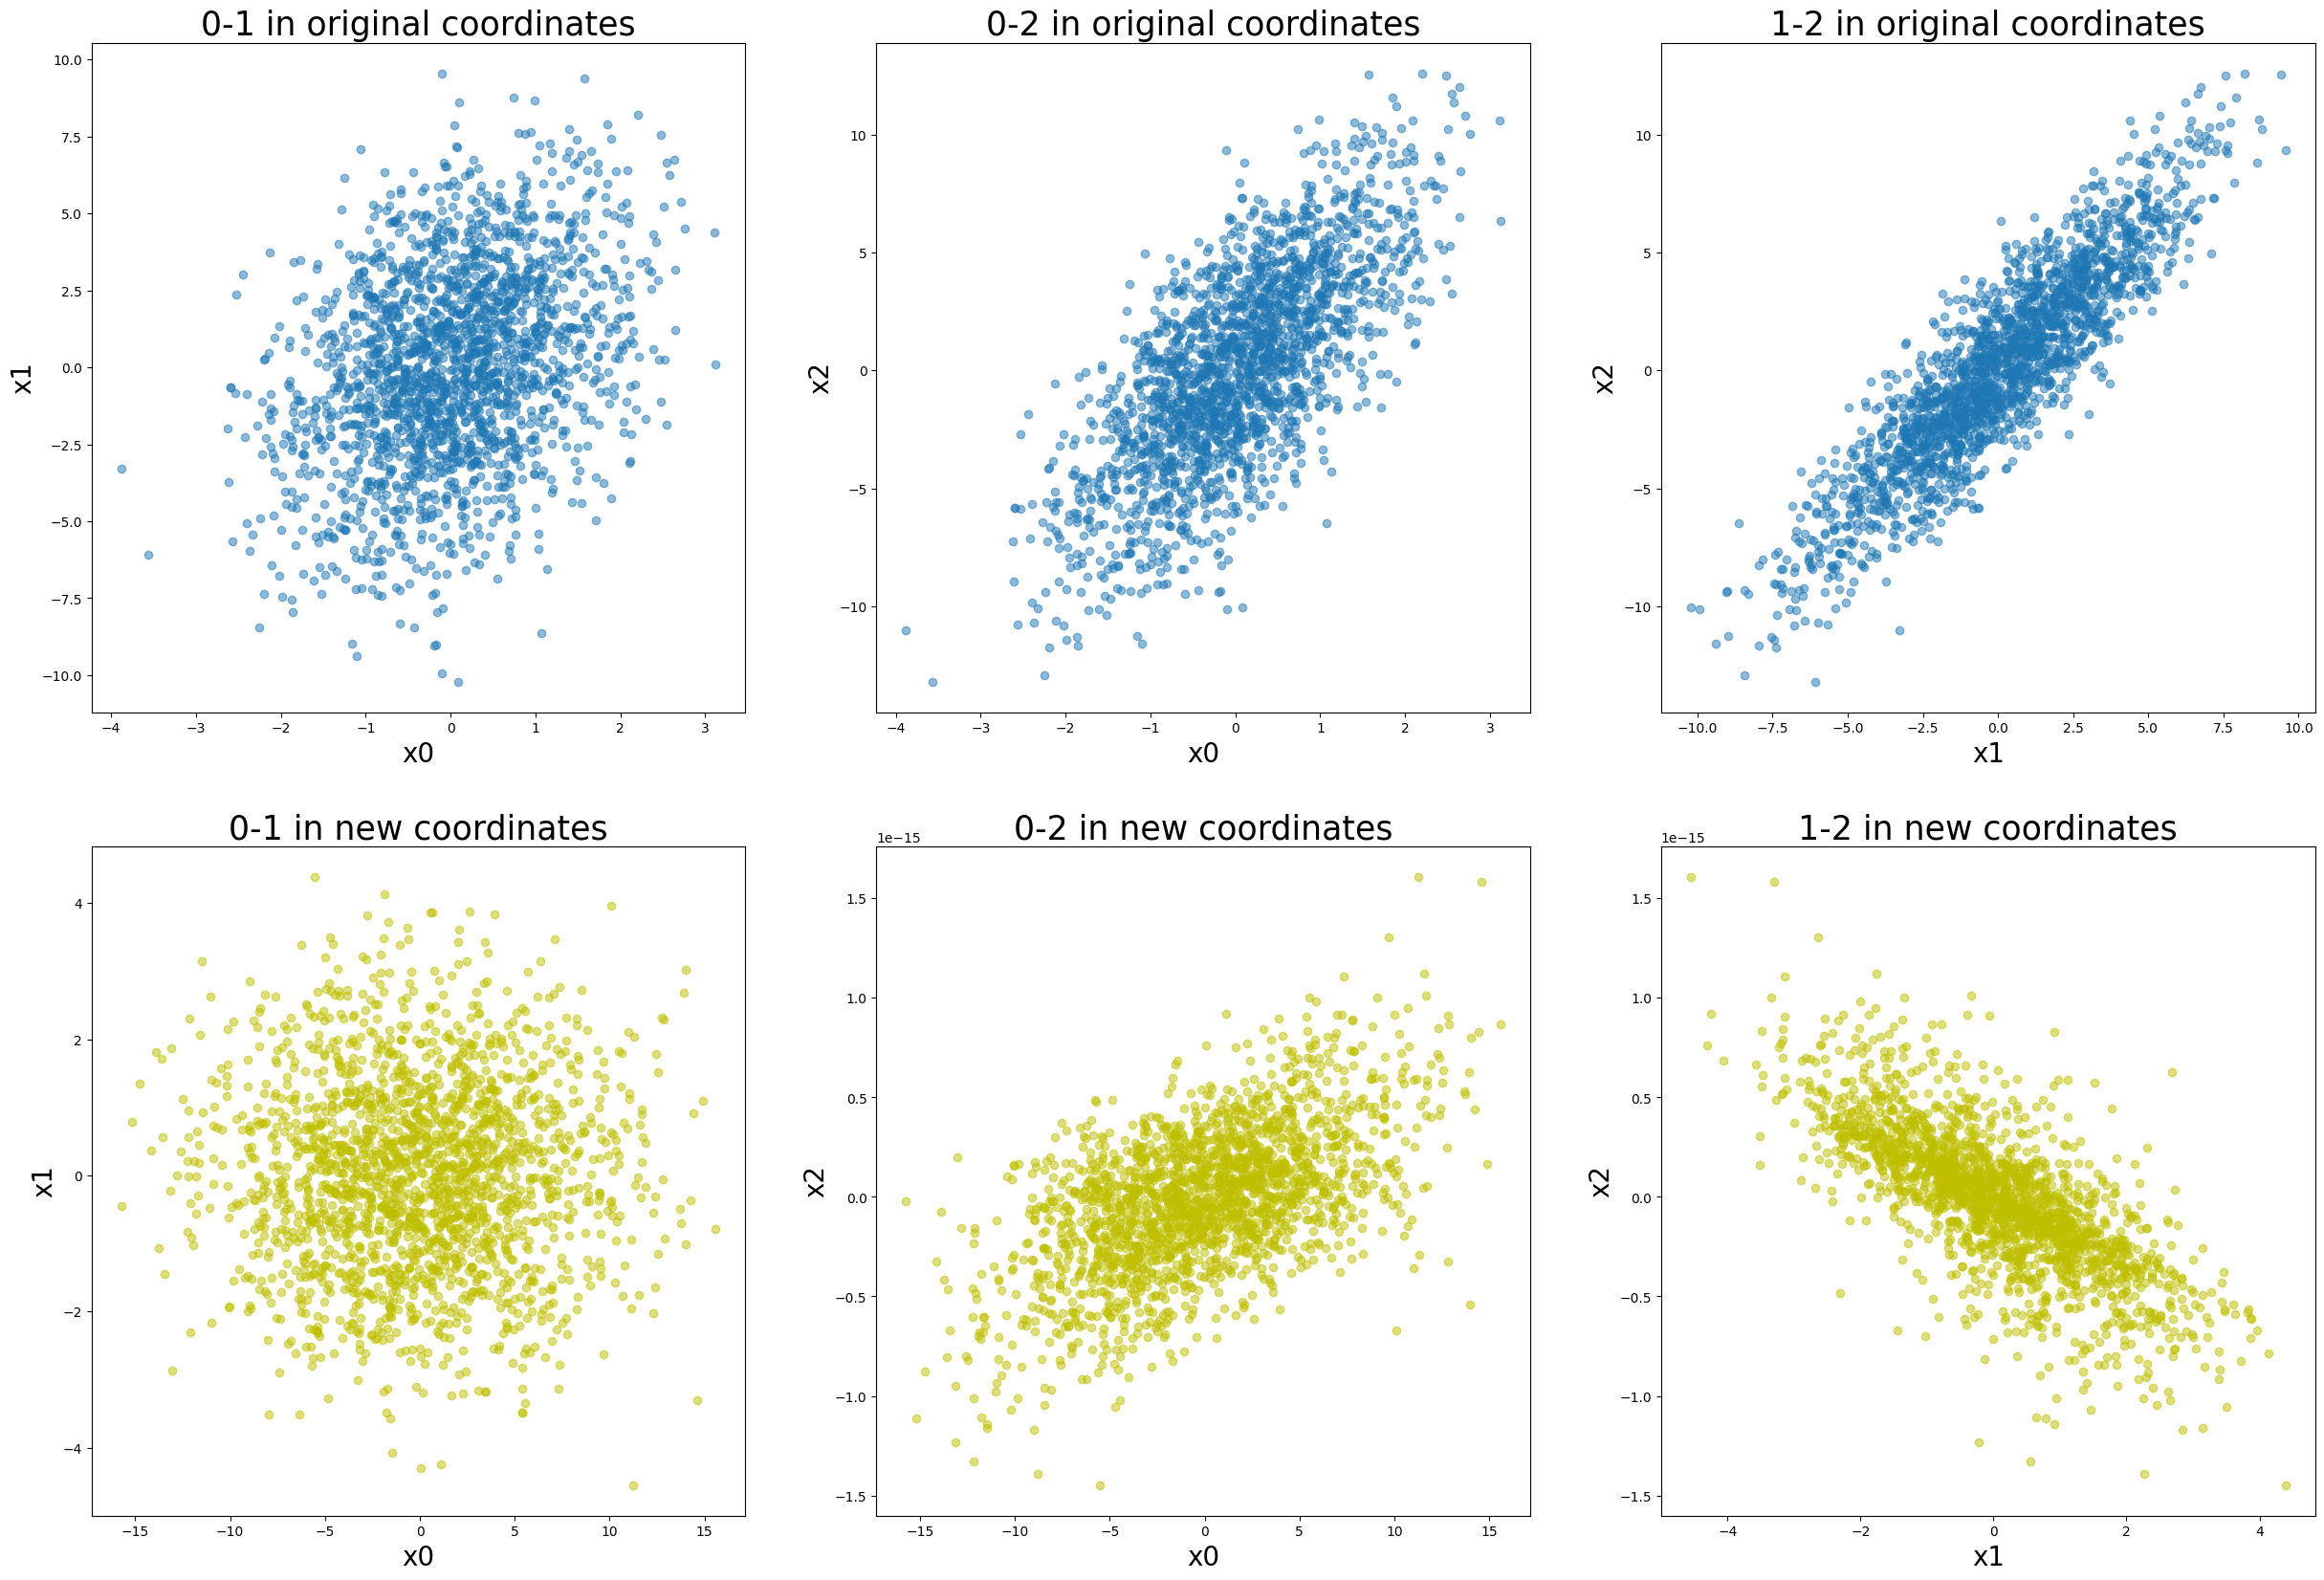

In [8]:
#plot

fig,((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(30, 20))
ax1.scatter(x1,x2, alpha=0.5)
ax1.set_title('0-1 in original coordinates', size=25)
ax1.set_xlabel('x0', size=20)
ax1.set_ylabel('x1', size=20)
ax2.scatter(x1,x3, alpha=0.5)
ax2.set_title('0-2 in original coordinates', size=25)
ax2.set_xlabel('x0', size=20)
ax2.set_ylabel('x2', size=20)
ax3.scatter(x2,x3, alpha=0.5)
ax3.set_title('1-2 in original coordinates', size=25)
ax3.set_xlabel('x1', size=20)
ax3.set_ylabel('x2', size=20)
ax4.scatter(matrix_3Dp[0,:],matrix_3Dp[1,:], alpha=0.5, c='y')
ax4.set_title('0-1 in new coordinates', size=25)
ax4.set_xlabel('x0', size=20)
ax4.set_ylabel('x1', size=20)
ax5.scatter(matrix_3Dp[0,:],matrix_3Dp[2,:], alpha=0.5, c='y')
ax5.set_title('0-2 in new coordinates', size=25)
ax5.set_xlabel('x0', size=20)
ax5.set_ylabel('x2', size=20)
ax6.scatter(matrix_3Dp[1,:],matrix_3Dp[2,:], alpha=0.5, c='y')
ax6.set_title('1-2 in new coordinates', size=25)
ax6.set_xlabel('x1', size=20)
ax6.set_ylabel('x2', size=20)

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [9]:
#noise
n0=np.random.normal(0,1/50,N)
n1=np.random.normal(0,1/50,N)
n2=np.random.normal(0,1/50,N)
n3=np.random.normal(0,1/50,N)
n4=np.random.normal(0,1/50,N)
n5=np.random.normal(0,1/50,N)
n6=np.random.normal(0,1/50,N)
n7=np.random.normal(0,1/50,N)
n8=np.random.normal(0,1/50,N)
n9=np.random.normal(0,1/50,N)

In [10]:
#matrix of the dataset
matrix_nD=np.vstack((x1,x2,x3,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9))
print('Matrix of the dataset:','\n',matrix_nD,'\n')
#covariance matrix
matrix_cov_n=np.cov(matrix_nD)
print('Covariance matrix:','\n',matrix_cov_n,'\n')

Matrix of the dataset: 
 [[ 4.71435164e-01 -1.19097569e+00  1.43270697e+00 ...  7.81462892e-01
   2.14715177e+00 -9.08350530e-01]
 [-3.08968830e+00  3.66026902e+00  1.30466307e+00 ...  2.89045371e+00
   1.19135550e+00 -2.10506142e-01]
 [-2.14681797e+00  1.27831763e+00  4.17007700e+00 ...  4.45337950e+00
   5.48565903e+00 -2.02720720e+00]
 ...
 [ 2.35587711e-02 -1.45128828e-02 -2.24654308e-02 ... -2.04971214e-02
   2.67046085e-03 -8.46828366e-03]
 [-2.44704982e-02 -4.29548609e-02 -1.90144052e-02 ... -1.54467980e-02
   2.56550034e-02  2.24369838e-02]
 [ 2.11046211e-02 -1.59677163e-02  3.63204418e-02 ... -6.91556421e-04
   1.54272975e-02 -5.22831330e-03]] 

Covariance matrix: 
 [[ 9.65192552e-01  1.03984257e+00  2.97022767e+00  3.57481543e-05
   1.22515945e-04 -9.34810981e-04 -8.35968461e-04 -2.45275347e-04
  -5.61948749e-05 -3.98414293e-04 -4.50325457e-04 -5.96772232e-04
   3.46406954e-04]
 [ 1.03984257e+00  9.88327874e+00  1.19629639e+01 -9.93923482e-07
  -2.61535495e-04 -2.23859840e-03

In [11]:
#eigenvectors and eigenvalues
l, V = la.eig(matrix_cov_n)
print('Eigenvalues:','\n',l,'\n')
print('Eigenvectors:','\n',V)

Eigenvalues: 
 [ 2.68627339e+01+0.j  1.88916010e+00+0.j -2.10372811e-16+0.j
  4.55560568e-04+0.j  4.35695049e-04+0.j  3.56174501e-04+0.j
  3.66657839e-04+0.j  4.24802191e-04+0.j  3.77883209e-04+0.j
  4.10133246e-04+0.j  3.88387040e-04+0.j  3.93469430e-04+0.j
  4.01051329e-04+0.j] 

Eigenvectors: 
 [[-1.15901328e-01 -5.65597014e-01 -8.16496581e-01  5.45215280e-05
   1.54531630e-04 -9.87750452e-05  2.37682722e-04  4.30080738e-05
  -1.27524970e-04 -3.26621647e-04 -7.13415303e-05 -9.66181187e-05
  -3.23348755e-05]
 [-5.76810936e-01  7.07546625e-01 -4.08248290e-01 -6.45924683e-05
  -1.52748529e-04  1.27075439e-04 -2.48924602e-04 -6.84954136e-05
   9.39782878e-05  2.96438960e-04 -2.20382573e-05  2.06851468e-04
  -1.04732886e-05]
 [-8.08613593e-01 -4.23647403e-01  4.08248290e-01  4.44505877e-05
   1.56314731e-04 -7.04746518e-05  2.26440843e-04  1.75207340e-05
  -1.61071651e-04 -3.56804334e-04 -1.64721318e-04  1.36152303e-05
  -7.51430396e-05]
 [-2.25514556e-06 -2.68890312e-05  3.32716307e-16 

In [12]:
#eigenvectors and eigenvalues using SVD
U, spectrum, Vt = la.svd(matrix_nD)
l_svd=spectrum**2/(N-1)
V_svd=U
print('Eigenvalues:','\n',l_svd,'\n')
print('Eigenvectors:','\n',V_svd)

Eigenvalues: 
 [2.68834998e+01 1.88961412e+00 4.55687686e-04 4.36035092e-04
 4.24885039e-04 4.10168059e-04 4.01070701e-04 3.93532680e-04
 3.88391130e-04 3.78452016e-04 3.66702503e-04 3.56626903e-04
 1.31670836e-30] 

Eigenvectors: 
 [[-1.15970841e-01  5.65582766e-01 -5.35788315e-05 -1.49791063e-04
   4.67883604e-05 -3.24362164e-04  3.46965838e-05  9.21897442e-05
   6.97148772e-05  1.35820107e-04 -2.35847846e-04  1.05661034e-04
  -8.16496581e-01]
 [-5.76723973e-01 -7.07617512e-01  6.44884286e-05  1.49168911e-04
  -7.14237246e-05  2.95130933e-04  9.07638145e-06 -2.02899974e-04
   2.37537633e-05 -1.02089950e-04  2.46527552e-04 -1.33823929e-04
  -4.08248290e-01]
 [-8.08665654e-01  4.23548020e-01 -4.26692344e-05 -1.50413215e-04
   2.21529961e-05 -3.53593395e-04  7.84695491e-05 -1.85204855e-05
   1.63183518e-04  1.69550265e-04 -2.25168140e-04  7.74981381e-05
   4.08248290e-01]
 [-4.53383399e-06  3.16744145e-05 -3.66547387e-01 -4.75837026e-01
   2.20399620e-01  2.56514635e-01 -2.00568551e-01 

In [13]:
#variability
Lambda=np.diag(l_svd)
print('Lambda: ','\n',Lambda,'\n')
print('Trace:','\n', np.trace(Lambda),'\n')
var=[]
for i in range(13):
    var.append(Lambda[i,i]/np.trace(Lambda))
print('Variability of the principal components: ','\n', var,'\n' )
print('Total variability of the principal components: ','\n', sum(var),'\n' )
print('Taking the two first principal components total variability: ','\n',(var[0]+var[1])/sum(var))

Lambda:  
 [[2.68834998e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 1.88961412e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.55687686e-04 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.36035092e-04
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  4.24885039e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.

In [14]:
matrix_nDp=np.dot(V_svd.T, matrix_nD)
matrix_nDp

array([[ 3.46327823e+00, -3.00658359e+00, -4.29078152e+00, ...,
        -5.35892867e+00, -5.37215458e+00,  1.86608620e+00],
       [ 1.54369448e+00, -2.72224148e+00,  1.65332737e+00, ...,
         2.82903619e-01,  2.69482651e+00, -1.22342024e+00],
       [ 1.73715572e-02,  4.03079201e-02,  4.25884696e-02, ...,
        -2.11250435e-03, -2.44158236e-02, -2.42026865e-02],
       ...,
       [ 3.30845673e-02,  1.13941188e-02,  2.35902810e-03, ...,
         2.88364649e-02,  1.00252090e-02,  7.16884896e-03],
       [ 3.33186469e-02, -4.58541506e-03, -1.05689867e-02, ...,
        -1.81060332e-02, -8.16842499e-03, -6.74465855e-03],
       [ 7.77156117e-16, -1.44328993e-15,  1.77635684e-15, ...,
         8.88178420e-16,  2.66453526e-15, -1.11022302e-15]])

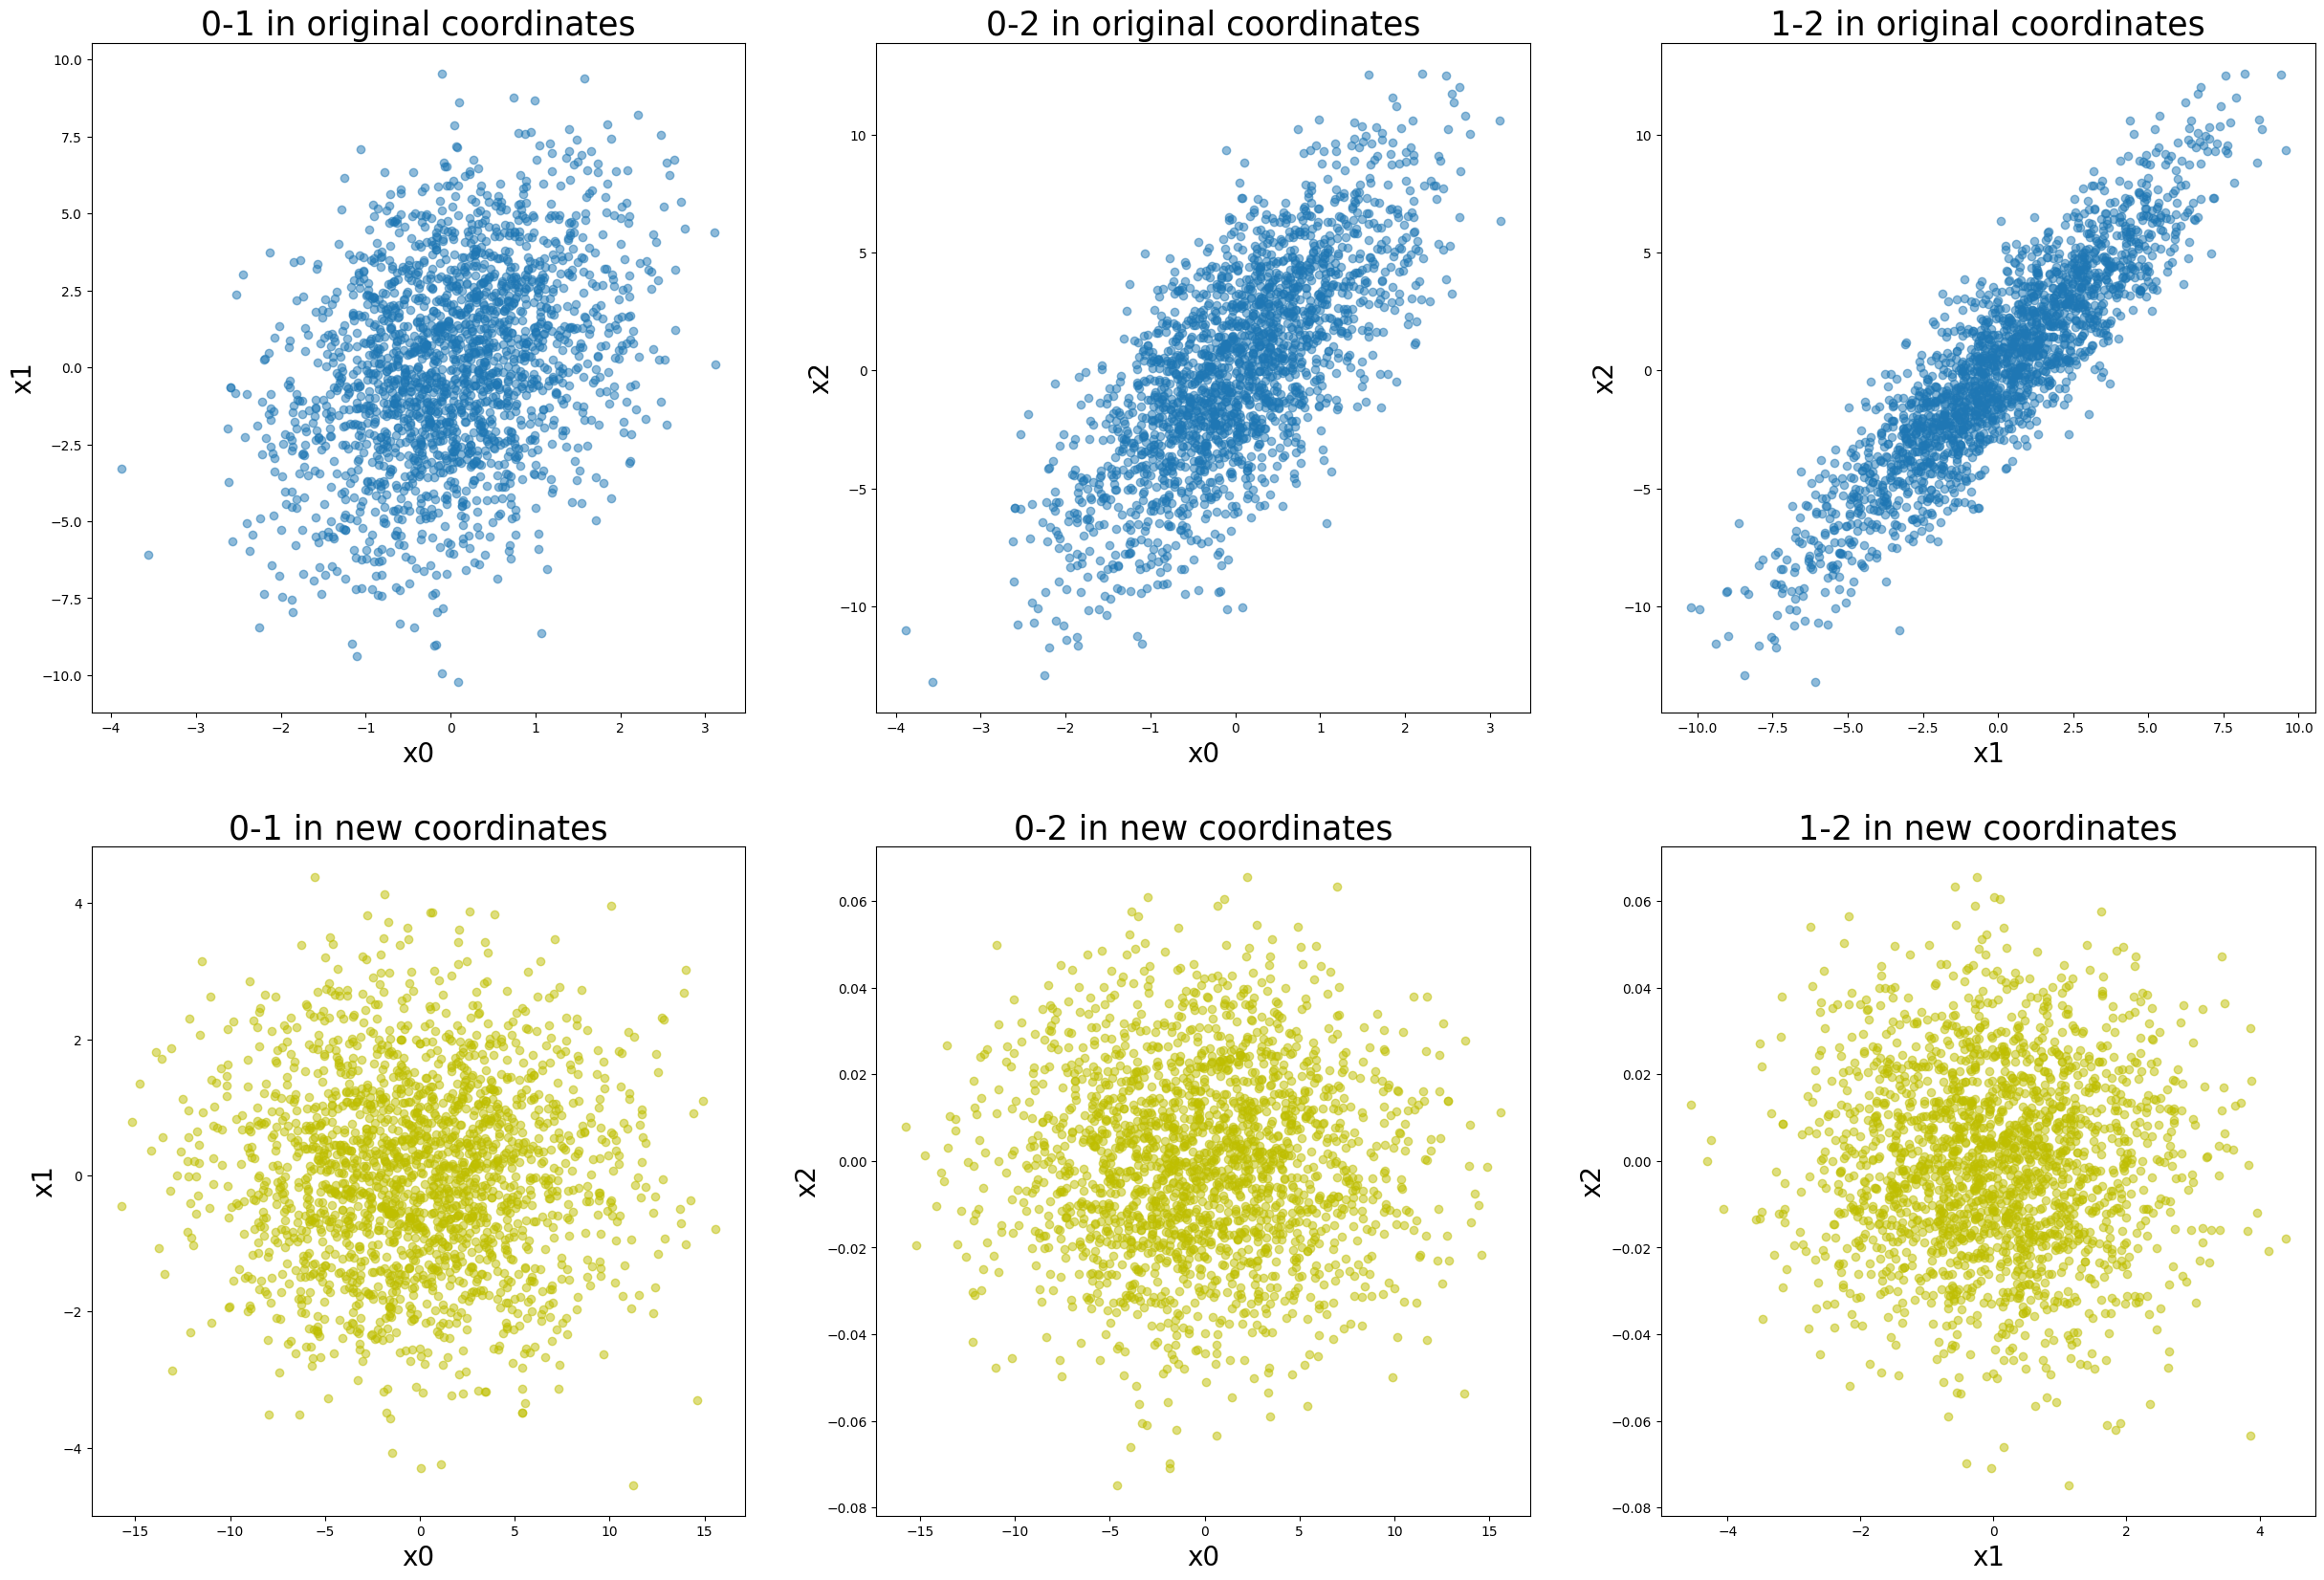

In [15]:
#plot

fig1,((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(30, 20))
ax1.scatter(x1,x2, alpha=0.5)
ax1.set_title('0-1 in original coordinates', size=25)
ax1.set_xlabel('x0', size=20)
ax1.set_ylabel('x1', size=20)
ax2.scatter(x1,x3, alpha=0.5)
ax2.set_title('0-2 in original coordinates', size=25)
ax2.set_xlabel('x0', size=20)
ax2.set_ylabel('x2', size=20)
ax3.scatter(x2,x3, alpha=0.5)
ax3.set_title('1-2 in original coordinates', size=25)
ax3.set_xlabel('x1', size=20)
ax3.set_ylabel('x2', size=20)
ax4.scatter(matrix_nDp[0,:],matrix_nDp[1,:], alpha=0.5, c='y')
ax4.set_title('0-1 in new coordinates', size=25)
ax4.set_xlabel('x0', size=20)
ax4.set_ylabel('x1', size=20)
ax5.scatter(matrix_nDp[0,:],matrix_nDp[2,:], alpha=0.5, c='y')
ax5.set_title('0-2 in new coordinates', size=25)
ax5.set_xlabel('x0', size=20)
ax5.set_ylabel('x2', size=20)
ax6.scatter(matrix_nDp[1,:],matrix_nDp[2,:], alpha=0.5, c='y')
ax6.set_title('1-2 in new coordinates', size=25)
ax6.set_xlabel('x1', size=20)
ax6.set_ylabel('x2', size=20);

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [16]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/

--2024-01-15 08:29:19--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data/magic04.data’

magic04.data            [ <=>                ]   1.41M  8.48MB/s    in 0.2s    

2024-01-15 08:29:19 (8.48 MB/s) - ‘data/magic04.data’ saved [1477391]

--2024-01-15 08:29:19--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data/magic04.names’

magic04.names           [ <=>                ]   5.27K  --.-KB/s    in 0s      

2024-01-15 08:29:19 (54.8 MB/s) - ‘data/mag